In [2]:
# librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#! pip install missingno
import missingno as msno 
# !pip install chardet
import chardet


In [3]:
# Leer los primeros 10000 bytes del archivo para detectar la codificación
with open('Terrazas_202104.csv', 'rb') as f:
    result = chardet.detect(f.read(10000))
    print(result)  # Esto mostrará la codificación detectada

{'encoding': 'Johab', 'confidence': 0.99, 'language': 'Korean'}


In [4]:
# leer los datos de Terrazas_202104.csv
terrazas_pd = pd.read_csv('Locales_202104.csv', delimiter=';', encoding='ISO-8859-1')
terrazas_pd.sample(10)

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,cod_barrio_local,id_seccion_censal_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,...,cal_acceso,coordenada_x_agrupacion,coordenada_y_agrup,id_agrupacion,nombre_agrupacion,id_tipo_agrup,desc_tipo_agrup,id_planta_agrupado,id_local_agrupado,rotulo
101808,285009747,6,TETUAN,605,VALDEACEDERAS,NaN,NaN,91,"440753,61","4479838,54",...,,NaN,NaN,NaN,NaN,NaN,NaN,PB,NaN,SIN ACTIVIDAD
88211,285031590,18,VILLA DE VALLECAS,1801,CASCO H.VALLECAS,NaN,NaN,4,"446880,53","4469991,44",...,,NaN,NaN,NaN,NaN,NaN,NaN,PB,NaN,SIN ACTIVIDAD
53401,280048958,8,FUENCARRAL-EL PARDO,808,EL GOLOSO,NaN,NaN,184,"440441,64","4483983,56",...,,NaN,NaN,NaN,NaN,NaN,NaN,PB,NaN,CHUPI LERENDI
111205,290000138,4,SALAMANCA,406,CASTELLANA,NaN,NaN,118,"441864,59","4476165,52",...,,NaN,NaN,NaN,NaN,NaN,NaN,PB,NaN,MARCELA
115344,290001164,18,VILLA DE VALLECAS,1801,CASCO H.VALLECAS,NaN,NaN,46,"444066,53","4468222,47",...,,"444020,53","4468274,47",99000571.0,Nave Polivalencia,17.0,Mercamadrid,NaN,06,[M0DULOS 6-8-10-12-14-16] - ANTES DIOCARNES
45533,280011853,1,CENTRO,106,SOL,NaN,NaN,121,"439966,59","4473921,53",...,,NaN,NaN,NaN,NaN,NaN,NaN,PB,NaN,COPAS ROTAS
145135,80000406,8,FUENCARRAL-EL PARDO,806,VALVERDE,NaN,NaN,121,"440993,63","4483276,55",...,,NaN,NaN,NaN,NaN,NaN,NaN,PB,NaN,POLIDEPORTIVO SANTA ANA
40703,285037627,13,PUENTE DE VALLECAS,1306,NUMANCIA,NaN,NaN,197,"443582,57","4472047,49",...,,NaN,NaN,NaN,NaN,NaN,NaN,PB,NaN,SIN ACTIVIDAD
122827,270130171,8,FUENCARRAL-EL PARDO,804,EL PILAR,NaN,NaN,73,"439472,63","4480900,56",...,,NaN,NaN,NaN,NaN,NaN,NaN,PB,NaN,BINGO SALA MONFORTE
145060,70002514,7,CHAMBERI,702,ARAPILES,NaN,NaN,24,"439720,6","4476572,54",...,,NaN,NaN,NaN,NaN,NaN,NaN,PB,NaN,MOTOFUNCION SUZUKI


In [5]:
# Dimensiones y tipos de datos del dataset

terrazas_pd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148216 entries, 0 to 148215
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id_local                   148216 non-null  int64  
 1   id_distrito_local          148216 non-null  int64  
 2   desc_distrito_local        148216 non-null  object 
 3   id_barrio_local            148216 non-null  int64  
 4   desc_barrio_local          148216 non-null  object 
 5   cod_barrio_local           0 non-null       float64
 6   id_seccion_censal_local    0 non-null       float64
 7   desc_seccion_censal_local  148216 non-null  int64  
 8   coordenada_x_local         148216 non-null  object 
 9   coordenada_y_local         148216 non-null  object 
 10  id_tipo_acceso_local       0 non-null       float64
 11  desc_tipo_acceso_local     148216 non-null  object 
 12  id_situacion_local         148216 non-null  int64  
 13  desc_situacion_local       14

In [6]:
# valores nulos
terrazas_pd.isnull().sum()

id_local                          0
id_distrito_local                 0
desc_distrito_local               0
id_barrio_local                   0
desc_barrio_local                 0
cod_barrio_local             148216
id_seccion_censal_local      148216
desc_seccion_censal_local         0
coordenada_x_local                0
coordenada_y_local                0
id_tipo_acceso_local         148216
desc_tipo_acceso_local            0
id_situacion_local                0
desc_situacion_local              0
id_vial_edificio             148216
clase_vial_edificio               0
desc_vial_edificio                0
id_ndp_edificio                   0
id_clase_ndp_edificio             0
nom_edificio                      0
num_edificio                      0
cal_edificio                      0
secuencial_local_PC               0
id_vial_acceso               148216
clase_vial_acceso                 0
desc_vial_acceso                  0
id_ndp_acceso                     0
id_clase_ndp_acceso         

In [7]:
# Mostar todas las columnas del dataset
pd.set_option('display.max_columns', None)
terrazas_pd.describe(include='all')


,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,cod_barrio_local,id_seccion_censal_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,id_tipo_acceso_local,desc_tipo_acceso_local,id_situacion_local,desc_situacion_local,id_vial_edificio,clase_vial_edificio,desc_vial_edificio,id_ndp_edificio,id_clase_ndp_edificio,nom_edificio,num_edificio,cal_edificio,secuencial_local_PC,id_vial_acceso,clase_vial_acceso,desc_vial_acceso,id_ndp_acceso,id_clase_ndp_acceso,nom_acceso,num_acceso,cal_acceso,coordenada_x_agrupacion,coordenada_y_agrup,id_agrupacion,nombre_agrupacion,id_tipo_agrup,desc_tipo_agrup,id_planta_agrupado,id_local_agrupado,rotulo
count,1.482160e+05,148216.000000,148216,148216.000000,148216,0.0,0.0,148216.000000,148216,148216,0.0,148216,148216.000000,148216,0.0,148216,148216,1.482160e+05,148216.0,148216,148216.000000,148216,148216.000000,0.0,148216,148216,1.482160e+05,148216.0,148216,148216.000000,148216,14219,14219,1.421900e+04,14219,14219.000000,14219,145731,14142,148216
unique,NaN,NaN,21,NaN,131,NaN,NaN,NaN,56920,76235,NaN,3,NaN,7,NaN,25,6071,NaN,NaN,2,NaN,30,NaN,NaN,25,6204,NaN,NaN,2,NaN,31,378,377,NaN,414,NaN,11,43,2632,74533
top,NaN,NaN,CENTRO,NaN,SAN ANDRES,NaN,NaN,NaN,0,0,NaN,Puerta Calle,NaN,Abierto,NaN,CALLE,ALCALA ...,NaN,NaN,NUM,NaN,,NaN,NaN,CALLE,ALCALA ...,NaN,NaN,NUM,NaN,,0,0,NaN,CENTRO COMERCIAL LA VAGUADA,NaN,Centro Comercial,PB,1,SIN ACTIVIDAD
freq,NaN,NaN,13218,NaN,4033,NaN,NaN,NaN,9863,9863,NaN,131910,NaN,102442,NaN,123376,1417,NaN,NaN,148027,NaN,140646,NaN,NaN,123253,1363,NaN,NaN,148026,NaN,140355,1074,1074,NaN,300,NaN,4001,140403,362,40752
mean,2.651706e+08,9.931526,NaN,996.599395,NaN,NaN,NaN,71.179960,NaN,NaN,NaN,NaN,2.148742,NaN,NaN,NaN,NaN,1.390133e+07,1.0,NaN,42.522778,NaN,22.776650,NaN,NaN,NaN,1.465291e+07,1.0,NaN,42.273196,NaN,NaN,NaN,9.900024e+07,NaN,7.119136,NaN,NaN,NaN,NaN
std,5.057176e+07,5.617585,NaN,561.640393,NaN,NaN,NaN,48.363377,NaN,NaN,NaN,NaN,1.908593,NaN,NaN,NaN,NaN,5.992675e+06,0.0,NaN,94.693803,NaN,61.114518,NaN,NaN,NaN,6.610475e+06,0.0,NaN,94.662741,NaN,NaN,NaN,1.693582e+02,NaN,5.489079,NaN,NaN,NaN,NaN
min,1.000000e+07,1.000000,NaN,101.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.100000e+07,1.0,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,1.100000e+07,1.0,NaN,1.000000,NaN,NaN,NaN,9.900000e+07,NaN,1.000000,NaN,NaN,NaN,NaN
25%,2.704755e+08,5.000000,NaN,505.000000,NaN,NaN,NaN,32.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.103044e+07,1.0,NaN,8.000000,NaN,10.000000,NaN,NaN,NaN,1.103411e+07,1.0,NaN,8.000000,NaN,NaN,NaN,9.900010e+07,NaN,1.000000,NaN,NaN,NaN,NaN
50%,2.800383e+08,10.000000,NaN,1004.000000,NaN,NaN,NaN,65.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.107757e+07,1.0,NaN,20.000000,NaN,10.000000,NaN,NaN,NaN,1.108553e+07,1.0,NaN,20.000000,NaN,NaN,NaN,9.900021e+07,NaN,4.000000,NaN,NaN,NaN,NaN
75%,2.850110e+08,15.000000,NaN,1501.000000,NaN,NaN,NaN,104.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,1.113265e+07,1.0,NaN,47.000000,NaN,20.000000,NaN,NaN,NaN,2.000760e+07,1.0,NaN,46.000000,NaN,NaN,NaN,9.900032e+07,NaN,12.000000,NaN,NaN,NaN,NaN


<Axes: >

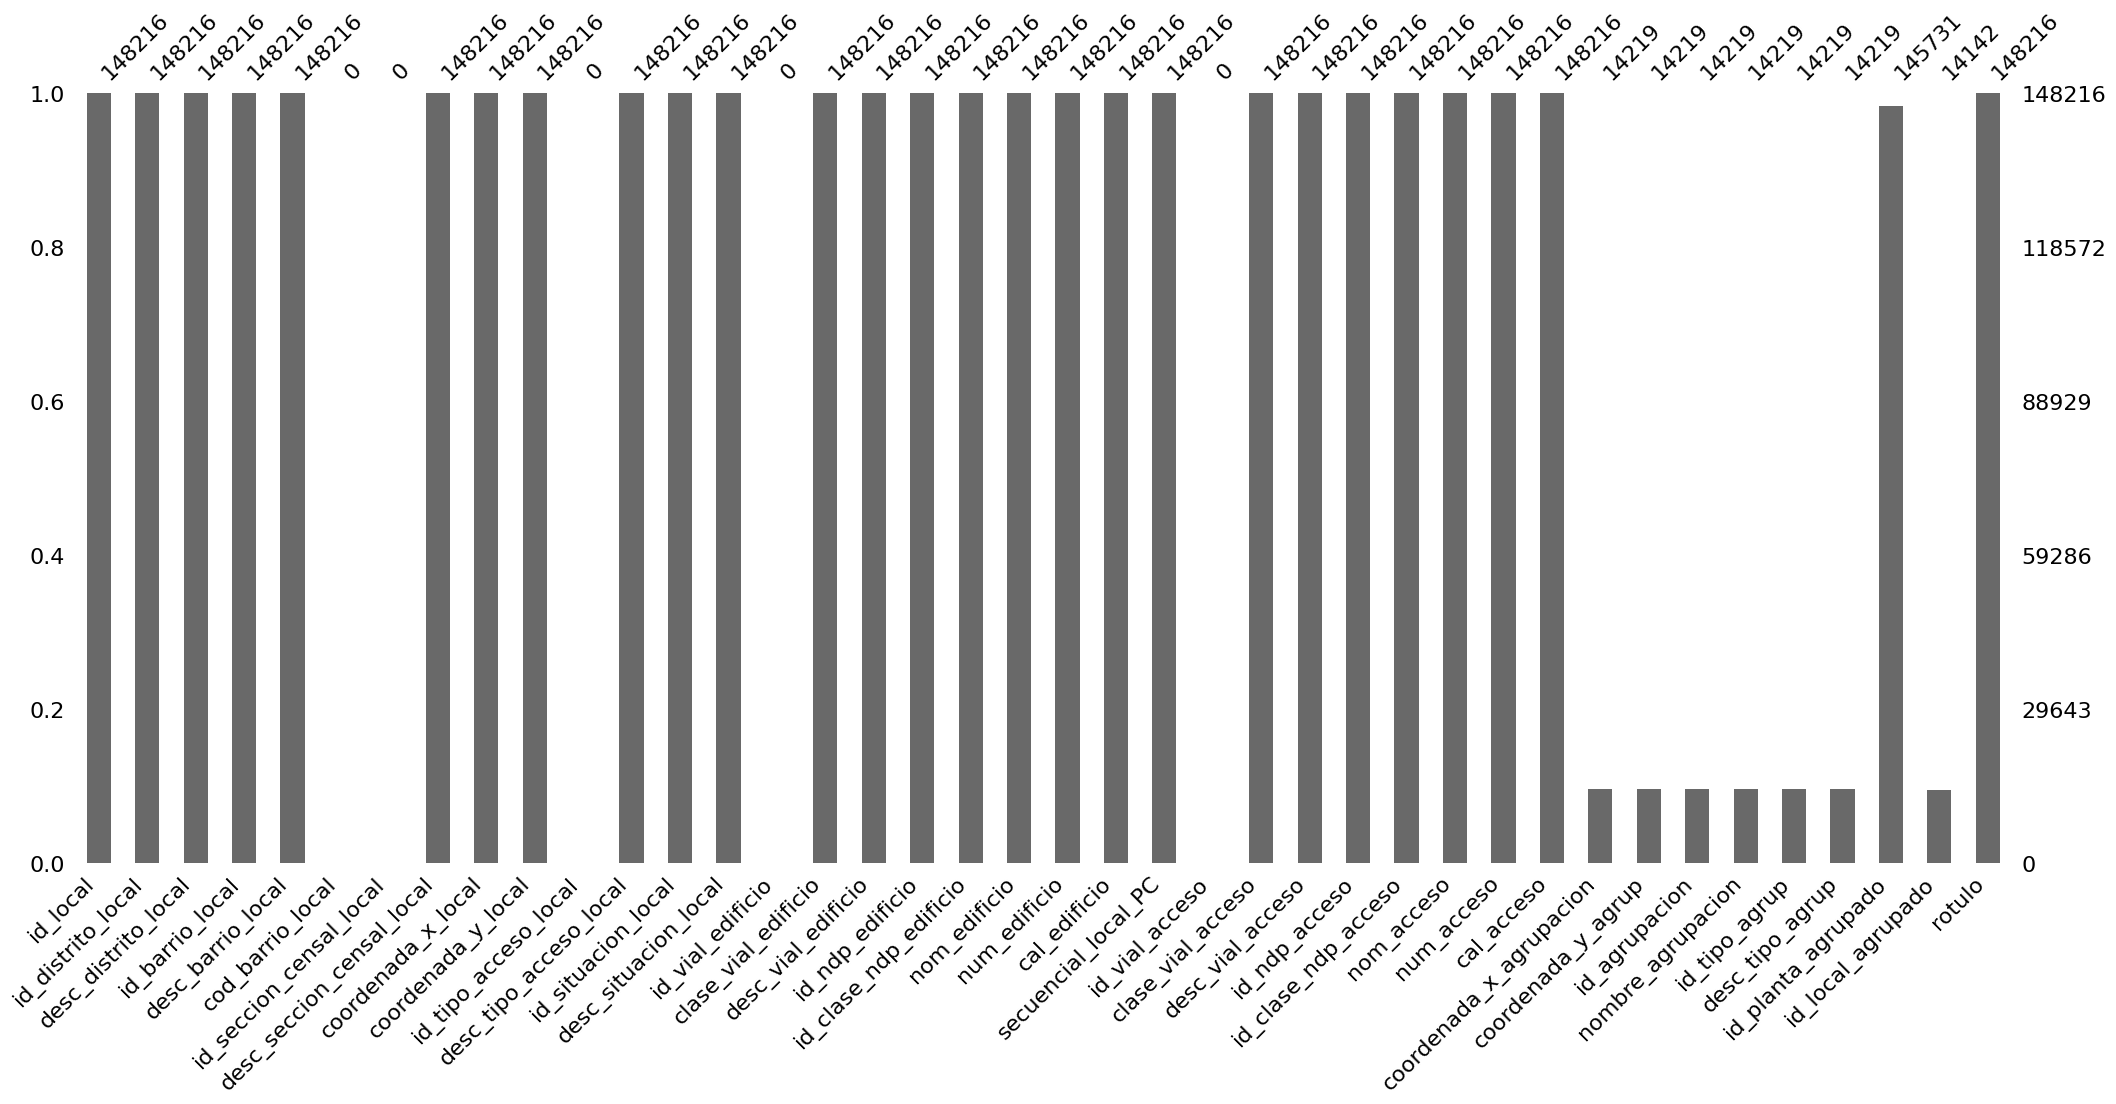

In [8]:
msno.bar(terrazas_pd)

<Axes: >

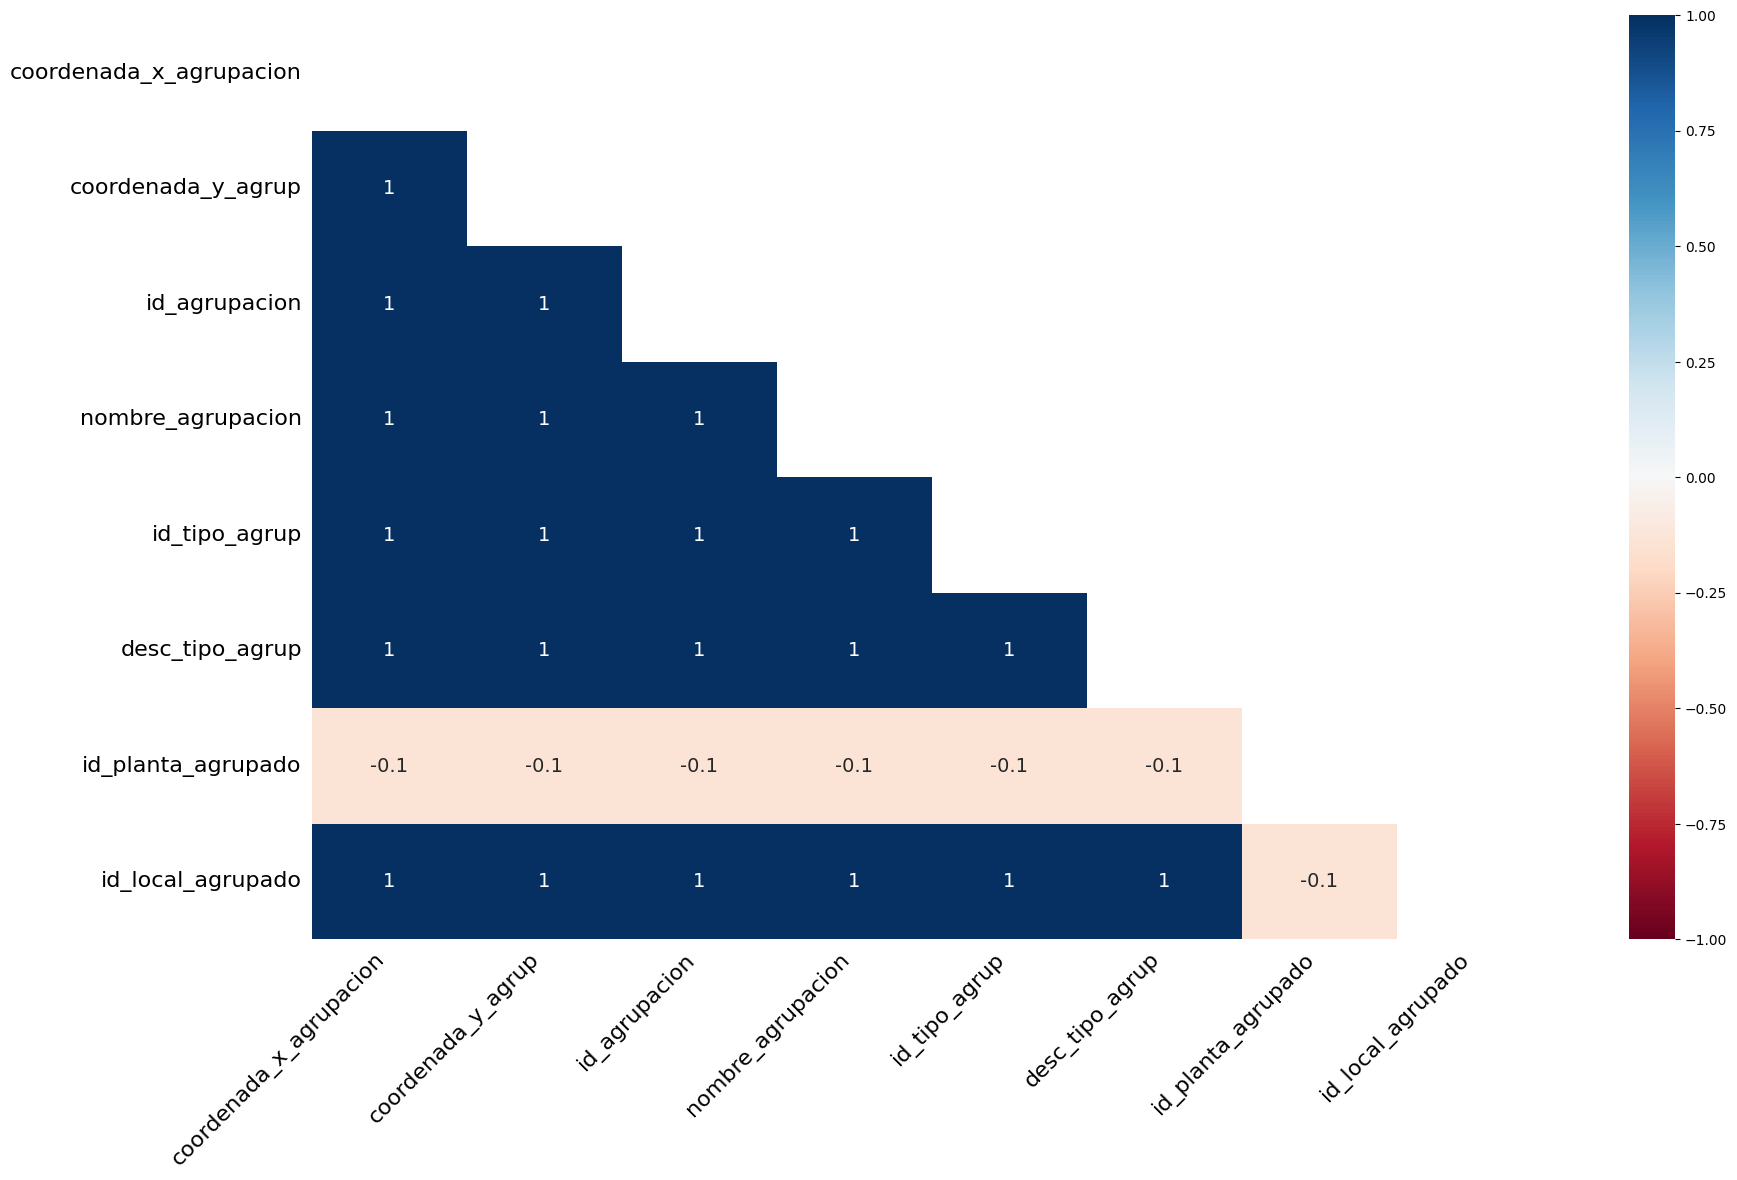

In [9]:
msno.heatmap(terrazas_pd)

<Axes: >

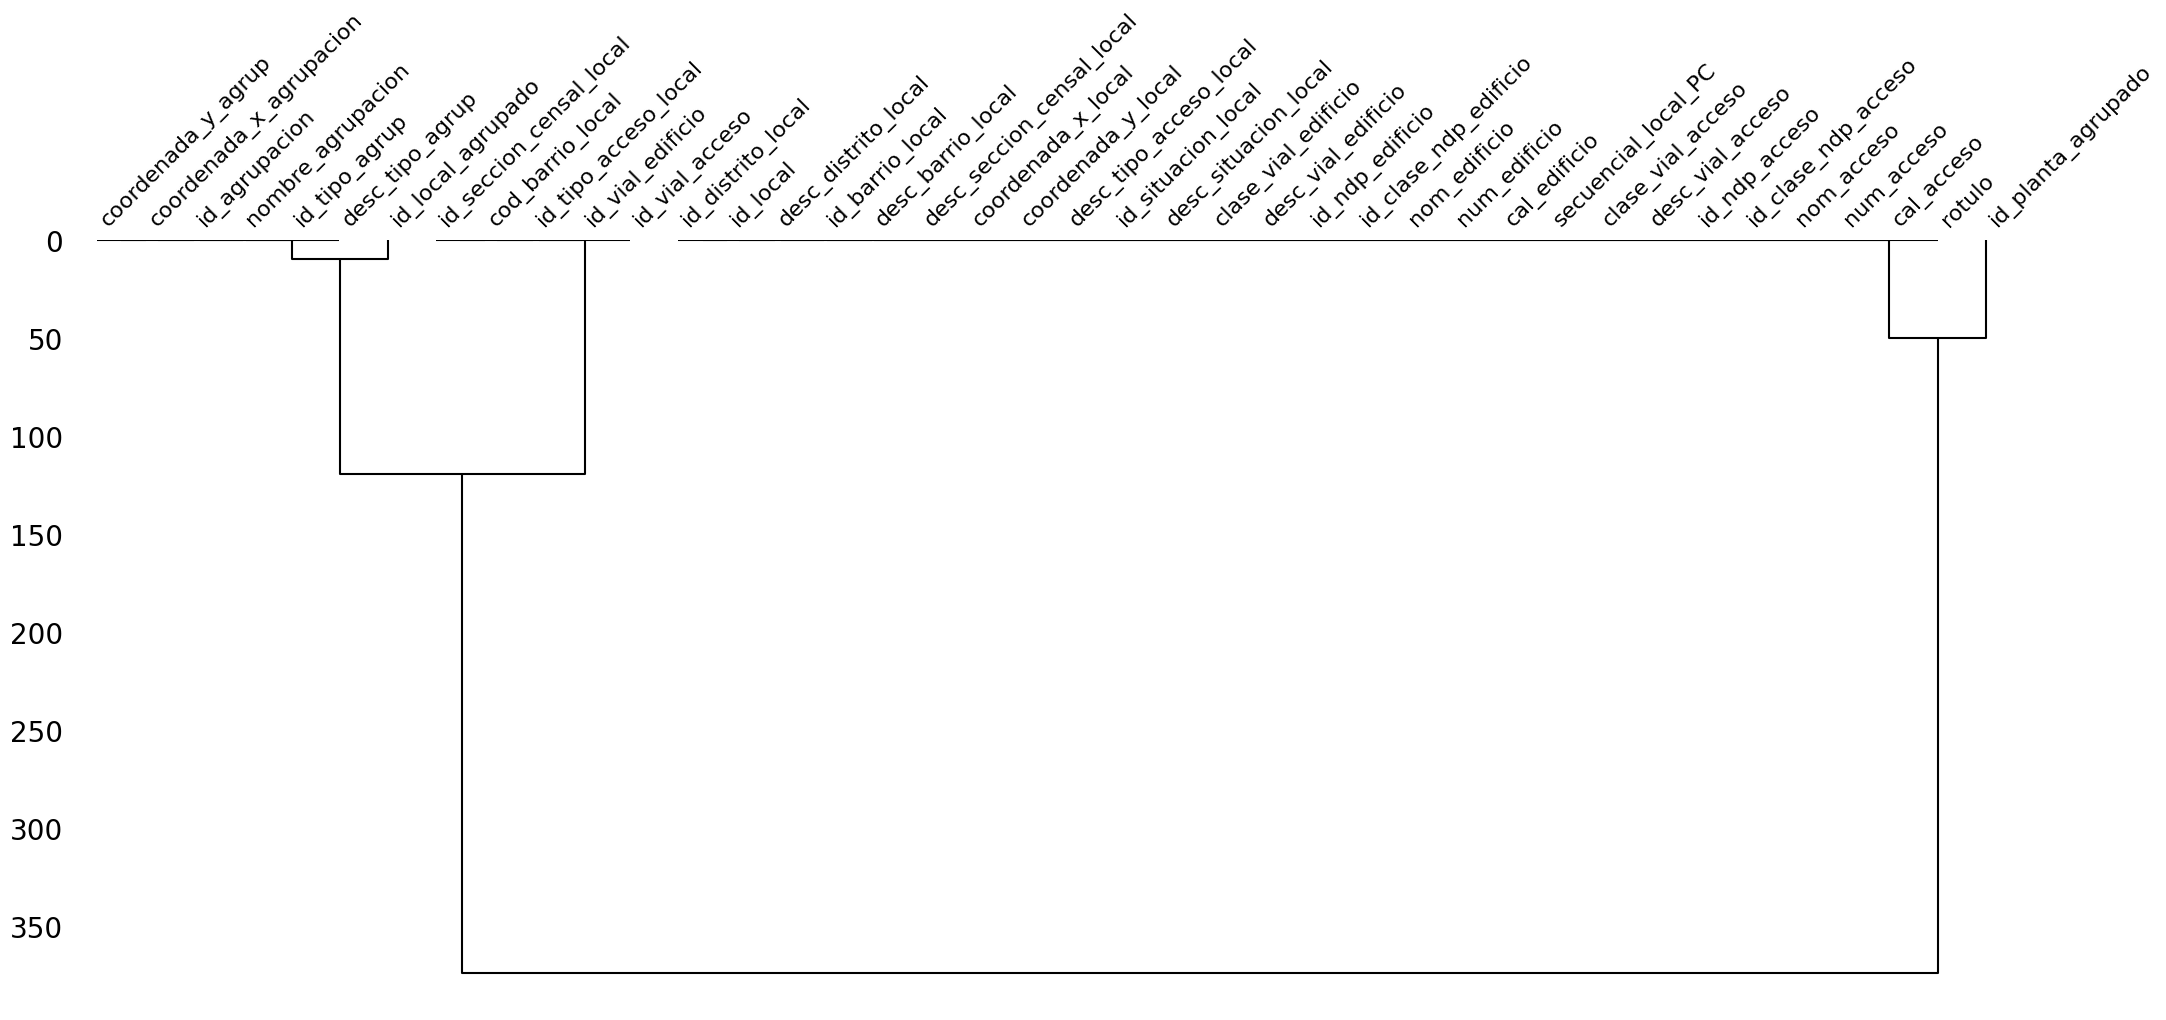

In [10]:
msno.dendrogram(terrazas_pd)

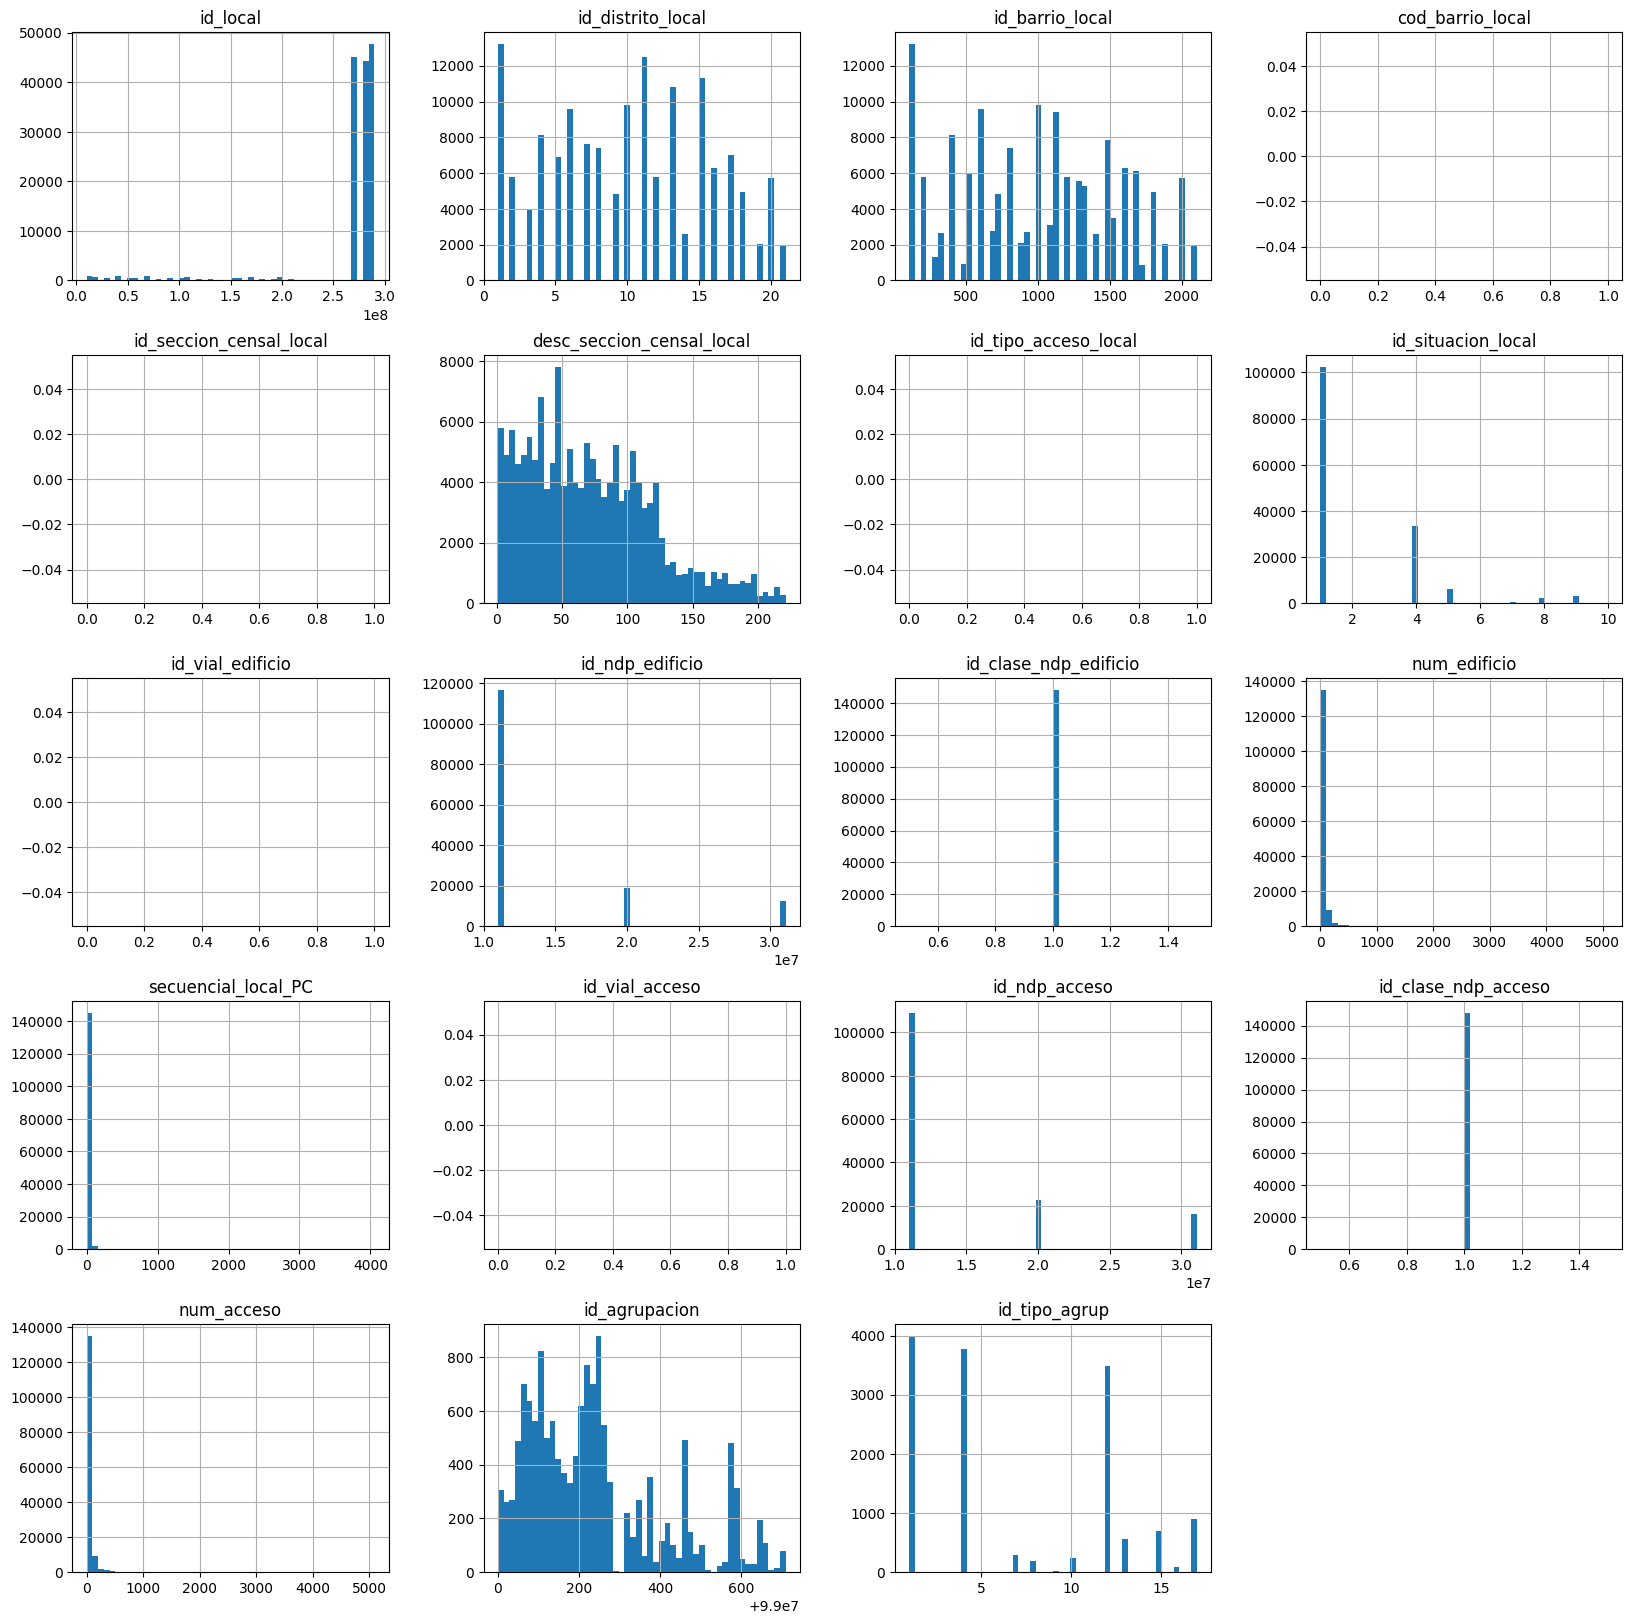

In [11]:
histograma = terrazas_pd.hist(figsize=(20, 20), bins=50)


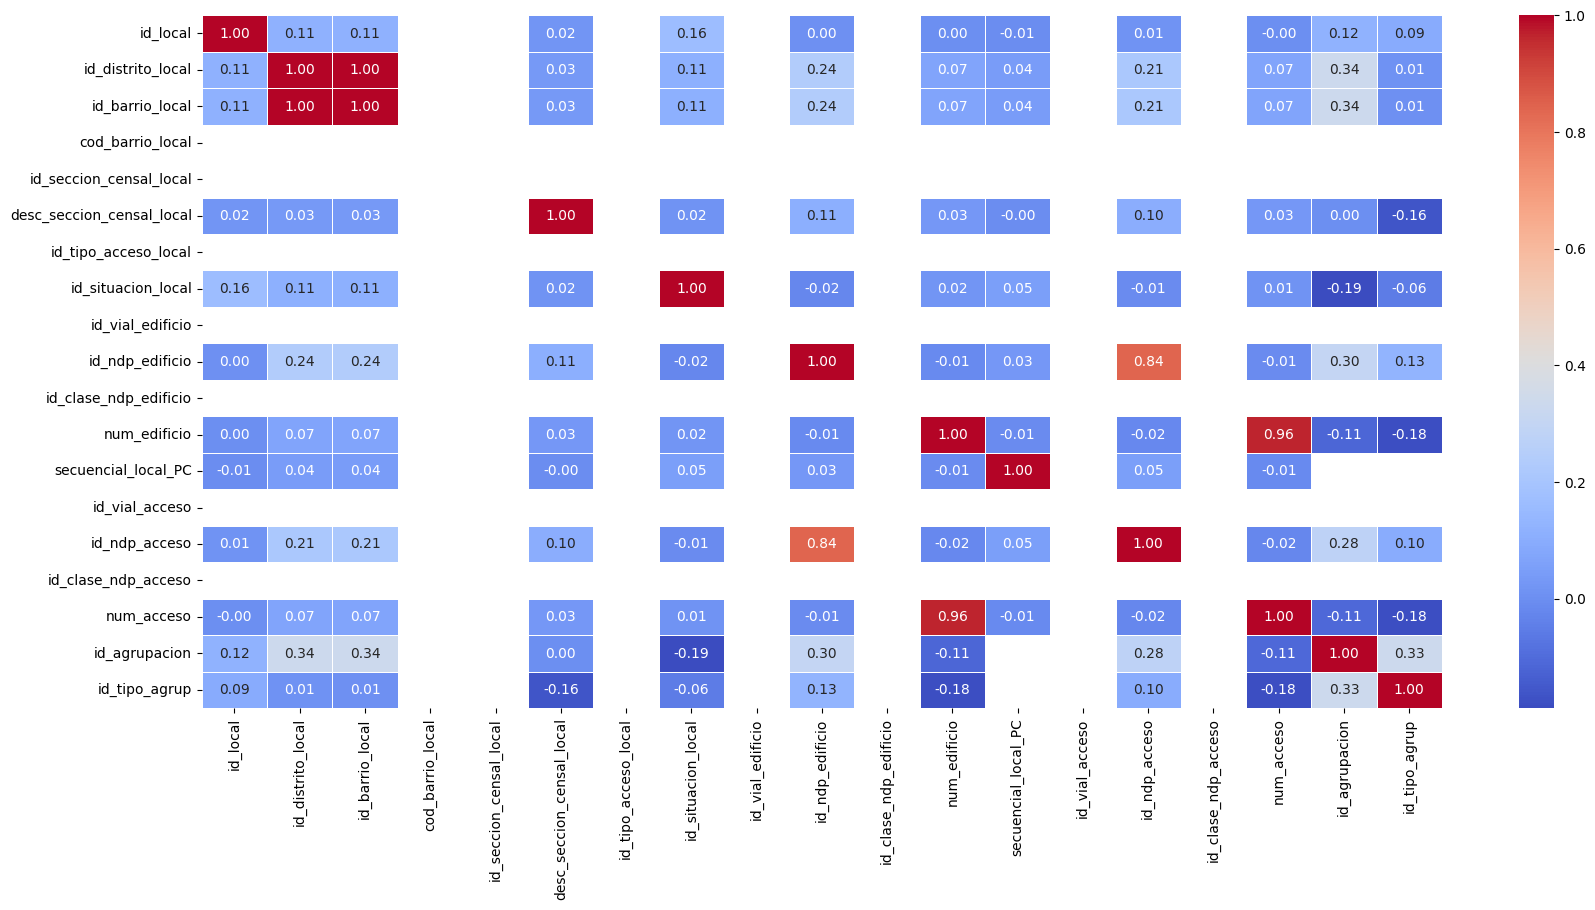

In [12]:
# Filtrar solo columnas numéricas del DataFrame
plt.figure(figsize=(20, 9))
df_numerico = terrazas_pd.select_dtypes(include=['number'])
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm', fmt=".2f",linewidth=.5)
plt.show()

C:\Users\ansab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


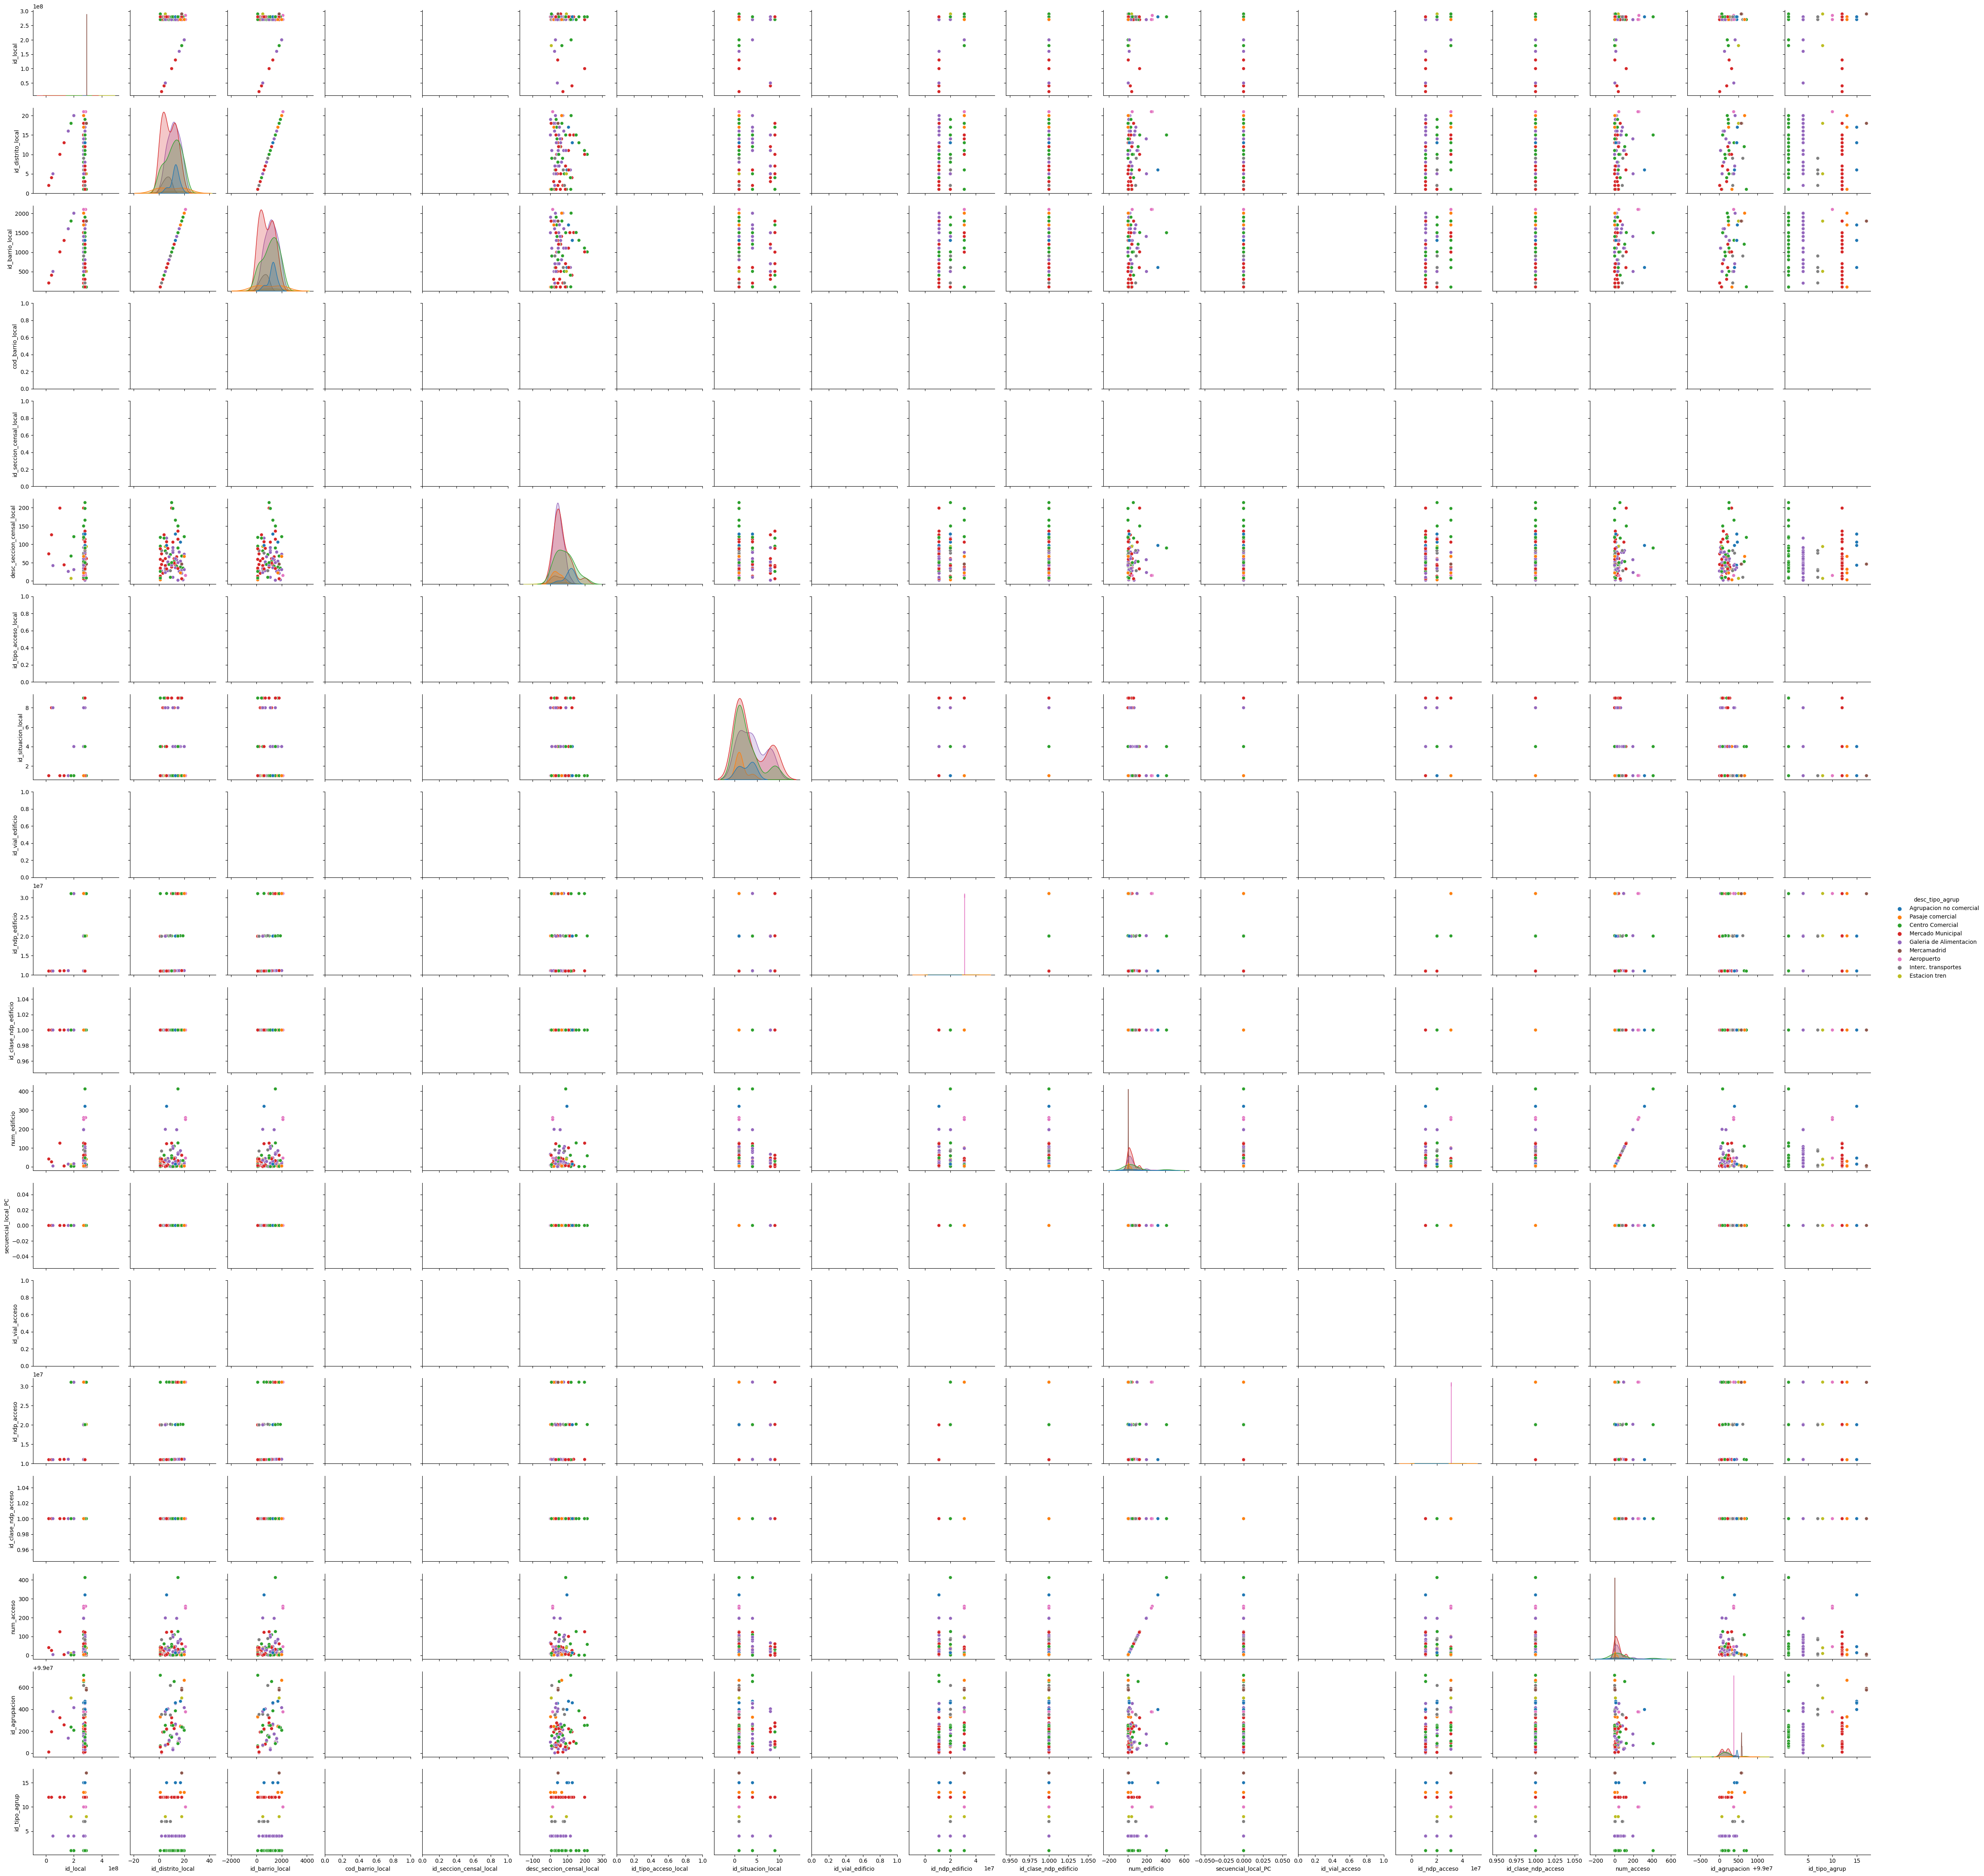

In [13]:
# Tomar una muestra aleatoria del 1% de los datos
sample_df = terrazas_pd.sample(frac=0.01, random_state=1)

# Crear la matriz de gráficos de dispersión
sns.pairplot(sample_df, hue='desc_tipo_agrup')
plt.show()

In [15]:
# Eliminar columnas sin datos
terrazas_pd_edit = terrazas_pd.drop(['cod_barrio_local','id_seccion_censal_local','id_tipo_acceso_local','id_vial_edificio','id_vial_acceso'], axis=1)
terrazas_pd_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148216 entries, 0 to 148215
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id_local                   148216 non-null  int64  
 1   id_distrito_local          148216 non-null  int64  
 2   desc_distrito_local        148216 non-null  object 
 3   id_barrio_local            148216 non-null  int64  
 4   desc_barrio_local          148216 non-null  object 
 5   desc_seccion_censal_local  148216 non-null  int64  
 6   coordenada_x_local         148216 non-null  object 
 7   coordenada_y_local         148216 non-null  object 
 8   desc_tipo_acceso_local     148216 non-null  object 
 9   id_situacion_local         148216 non-null  int64  
 10  desc_situacion_local       148216 non-null  object 
 11  clase_vial_edificio        148216 non-null  object 
 12  desc_vial_edificio         148216 non-null  object 
 13  id_ndp_edificio            14